# Example 4: Global sensitivity analysis using Message Passing Interface (MPI)

This notebook demonstrates how to perform global sensitivity analysis using distributed computing via Message Passing Interface (MPI) on the [asymmetric_division](https://github.com/MathCancer/PhysiCell/tree/master/sample_projects/asymmetric_division) PhysiCell model. MPI enables efficient scaling across multiple computing nodes or cores, making it ideal for high-performance computing environments and large-scale parameter studies.

The MPI-based approach offers several advantages:
1. **Distributed computing**: Simulations are distributed across multiple processes, potentially spanning multiple compute nodes
2. **Scalable parallelization**: Can utilize hundreds or thousands of cores simultaneously
3. **Memory efficiency**: Each MPI process manages its own memory space, avoiding memory bottlenecks
4. **Fault tolerance**: Failed processes don't necessarily crash the entire computation

The analysis employs Sobol sampling to generate parameter sets and examines stem cell division dynamics. The model includes a mathematical constraint where division probabilities must sum to 1, allowing for system reparameterization: probability of dividing into `progenitor_2` = 1 - probability of dividing into `progenitor_1`.

Parameters examined:
- **cycle_duration_stem_cell**: Duration of the stem cell cycle
- **asym_div_to_prog_1_sat**: Saturation of the probability that a stem cell divides into `progenitor_1` when in contact with `progenitor_1`
- **asym_div_to_prog_2_sat**: Saturation of the probability that a stem cell divides into `progenitor_2` when in contact with `progenitor_2`

The MPI implementation details are provided in [ex4_runSA_MPI.py](ex4_runSA_MPI.py), which handles process coordination and data aggregation.

## Create the Model Analysis Context, Generate Samples, and Run Simulations using MPI

In [1]:
%%bash
mpiexec -n 8 python ex4_runSA_MPI.py

Initializing MPI job with 8 processes...
PhysiCell already exists at: PhysiCell-master
Skipping download. Use force_download=True to override.
Generated 48 samples using Sobol
Inserting parameter: cycle_duration_stem_cell with properties: {'lower_bound': 1152.0, 'upper_bound': 1728.0, 'ref_value': 1440.0, 'perturbation': None}
Inserting parameter: asym_div_to_prog_1_sat with properties: {'lower_bound': 0.0, 'upper_bound': 1.0, 'ref_value': 0.0, 'perturbation': None}
Inserting {'frac_proj1_cells': None, 'frac_proj2_cells': None, 'run_time_sec': None} QoIs into the database
Simulations completed and results stored in the database: ex4_PhysiCell_SA_MPI.db.


## Load the results

In [2]:
# Load results from the database
from uq_physicell.database.ma_db import load_output
from uq_physicell.model_analysis.utils import calculate_qoi_statistics

# Load the results
db_path = "ex4_PhysiCell_SA_MPI.db"
# Load QoIs from db (This load the summary statistics directly, as the darabase is already summarized)
df_output = load_output(db_path)
qoi_funcs = {'frac_proj1_cells':None, 'frac_proj2_cells':None, 'run_time_sec':None}
df_summary_qois, df_relative_mcse = calculate_qoi_statistics(df_output, qoi_funcs=qoi_funcs, db_file_path=db_path)
display(df_summary_qois)

Calculating QoIs from DataFrame...
Number of replicates: 5


,frac_proj1_cells_0,frac_proj2_cells_0,run_time_sec_0,time_0
SampleID,,,,
0,0.866912,0.102941,11.114554,2880.01
1,0.905080,0.065300,11.477597,2880.01
2,0.672992,0.296849,10.884653,2880.01
3,0.695300,0.274173,10.474824,2880.01
4,0.847159,0.122348,9.871541,2880.01
5,0.646780,0.322683,10.185283,2880.01
6,0.675368,0.294485,10.295426,2880.01
7,0.668919,0.300376,10.605881,2880.01
8,0.765787,0.203519,10.689636,2880.01


### Plot the summary stats and Monte Carlo Standart Error (MCSE)

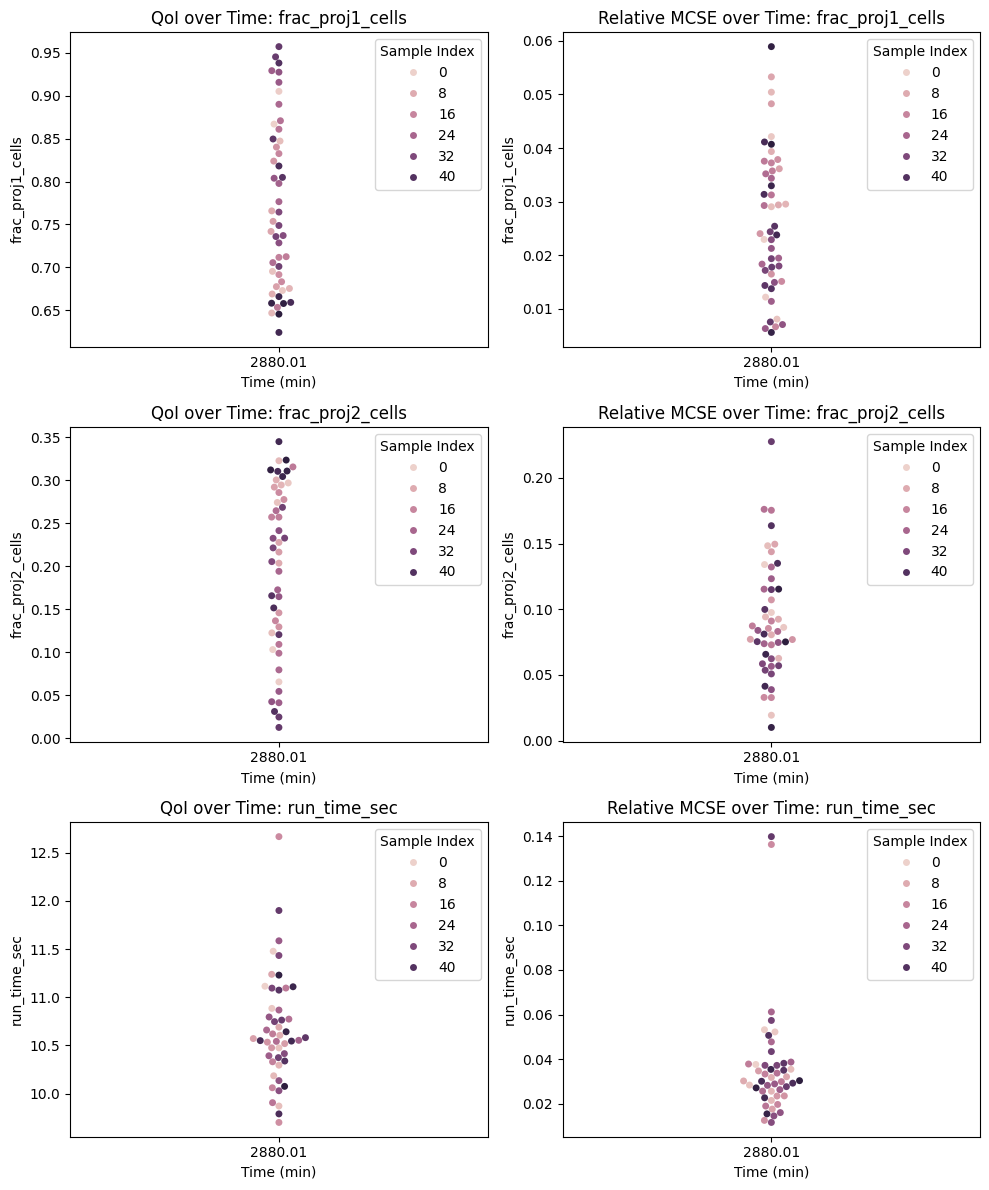

In [3]:
import matplotlib.pyplot as plt
from uq_physicell.gui.utils import plot_qoi_over_time

fig, axes = plt.subplots(len(qoi_funcs.keys()), 2, figsize=(10, 4*len(qoi_funcs.keys())))
for ax_id, qoi_name in enumerate(qoi_funcs.keys()):
     # Plot QoI time series
    plot_qoi_over_time(df_summary_qois, qoi_name, axes[ax_id,0])
    axes[ax_id,0].set_title(f"QoI over Time: {qoi_name}")
    # Plot mcse
    plot_qoi_over_time(df_relative_mcse, qoi_name, axes[ax_id,1])
    axes[ax_id,1].set_title(f"Relative MCSE over Time: {qoi_name}")

# Ensure proper layout and save the figure
plt.tight_layout()  # This will automatically adjust spacing to prevent overlaps

## Run the Sobol Sensitivity Analysis

Running Sobol Sensitivity Analysis for QoI: frac_proj1_cells and time: 2880.01
Running Sobol Sensitivity Analysis for QoI: frac_proj2_cells and time: 2880.01
Running Sobol Sensitivity Analysis for QoI: run_time_sec and time: 2880.01


/Users/heberlr/Documents/GitHub/UQ_PhysiCell/uq_physicell/gui/utils.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  global_SA_parameters[param]["perturbation"] = 100.0 * (df_parameter_space['upper_bound'].iloc[id]/df_parameter_space['ref_value'].iloc[id] - 1.0)
/Users/heberlr/.pyenv/versions/pcvenv/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


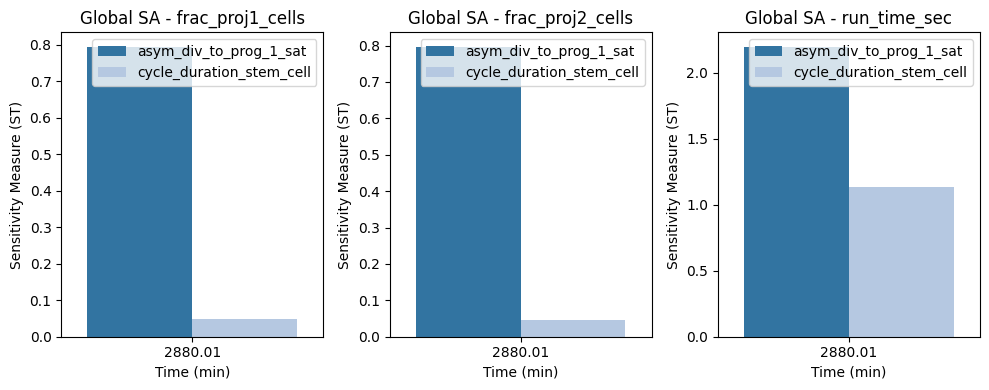

In [4]:
from uq_physicell.gui.utils import get_global_SA_parameters, plot_global_sa_results
from uq_physicell.model_analysis import run_global_sa

sa_method = "Sobol Sensitivity Analysis"
global_SA_parameters = get_global_SA_parameters(db_path)
sa_results, qoi_time_values = run_global_sa(global_SA_parameters, sa_method, qoi_funcs, df_summary_qois)

# Plot Global SA results
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for ax_id, qoi_name in enumerate(qoi_funcs.keys()):
    plot_global_sa_results(global_SA_parameters, sa_method, qoi_time_values, sa_results, qoi_name, 'ST' , axes[ax_id])
    axes[ax_id].set_title(f'Global SA - {qoi_name}')
    axes[ax_id].legend(loc='best')

plt.tight_layout()